#                                                       CRYOTHERAPY
## Nama                        : Nur Faizah
## NIM                           : 09011181722027
## Kelas                        : SK 5A
## Dosen Pembimbing : Prof.Dr.Ir. Siti Nurmaini, M.T.

### IMPORT PACKAGES
Berikut kegunaan import packages yaitu, Numpy digunakan untuk generate array untuk membuat grafik confusion matriks.Pandas digunakan untuk Load Dataset. matplotlib digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix dan grafik akurasi. Seaborn digunakan untuk plot grafik distribusi nilai dari Class (output), seaborn ini berbasis matplotlib. Sklearn digunakan untuk mengolah data Machine Learning seperti preprocessing. Keras digunakan untuk membuat, menambah, dan mengevaluasi model neural network. 

In [1]:
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### IMPORT DATASET
Dataset yang dugunakan dalam hal ini adalah Cryotherapy by UCI Machine Learning.
head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).


In [2]:
df = pd.read_csv('Cryotherapy.csv')
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
sex                    105 non-null int64
age                    105 non-null int64
Time                   105 non-null float64
Number_of_Warts        105 non-null int64
Type                   105 non-null int64
Area                   105 non-null int64
Result_of_Treatment    105 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.9 KB


In [4]:
df_1 = df.drop(columns=["age","Time",])
df_1.head()

,sex,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,5,1,100,0
1,1,5,1,96,1
2,1,1,3,132,0
3,1,7,3,750,0
4,1,1,1,42,0


In [5]:
enc = LabelEncoder()
df_2 = df_1.apply(enc.fit_transform)
df_2.head()

,sex,Number_of_Warts,Type,Area,Result_of_Treatment
0,0,4,0,22,0
1,0,4,0,21,1
2,0,0,2,25,0
3,0,6,2,28,0
4,0,0,0,9,0


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
sex                    105 non-null int64
Number_of_Warts        105 non-null int64
Type                   105 non-null int64
Area                   105 non-null int64
Result_of_Treatment    105 non-null int64
dtypes: int64(5)
memory usage: 4.2 KB


In [7]:
df_2.shape

(105, 5)

In [8]:
df_2.Result_of_Treatment.value_counts()

1    57
0    48
Name: Result_of_Treatment, dtype: int64

In [9]:
df_2['Area'].value_counts()

4     10
22    10
1      9
18     6
15     6
7      5
3      4
17     4
12     4
28     3
13     3
2      3
6      3
9      3
0      3
27     3
16     3
20     3
21     3
23     3
25     3
26     3
5      2
11     1
10     1
19     1
8      1
24     1
14     1
Name: Area, dtype: int64

In [10]:
x = np.array(df_2.ix[:, 0:4])
y = np.array(df_2.ix[:, 4])

C:\Users\NurFaizah\Anaconda3\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\NurFaizah\Anaconda3\envs\tensorflow-session\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\NurFaizah\Anaconda3\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentati

In [11]:
df_2.describe()

,sex,Number_of_Warts,Type,Area,Result_of_Treatment
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.514286,4.580952,0.723810,13.085714,0.542857
std,0.539128,3.455155,0.882471,8.767416,0.500549
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,4.000000,0.000000
50%,0.000000,4.000000,0.000000,14.000000,1.000000
75%,1.000000,7.000000,2.000000,21.000000,1.000000
max,2.000000,11.000000,2.000000,28.000000,1.000000


In [12]:
true = df_2[df_2.Result_of_Treatment==1]
false = df_2[df_2.Result_of_Treatment==0]

Text(0, 0.5, 'Frequency')

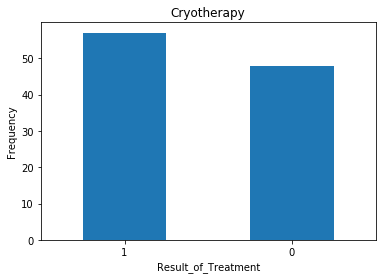

In [13]:
hazardous = ['False','True']
classes = pd.value_counts(df_2['Result_of_Treatment'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Cryotherapy")
plt.xlabel("Result_of_Treatment")
plt.ylabel("Frequency")

### HISTOGRAM
Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.
hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

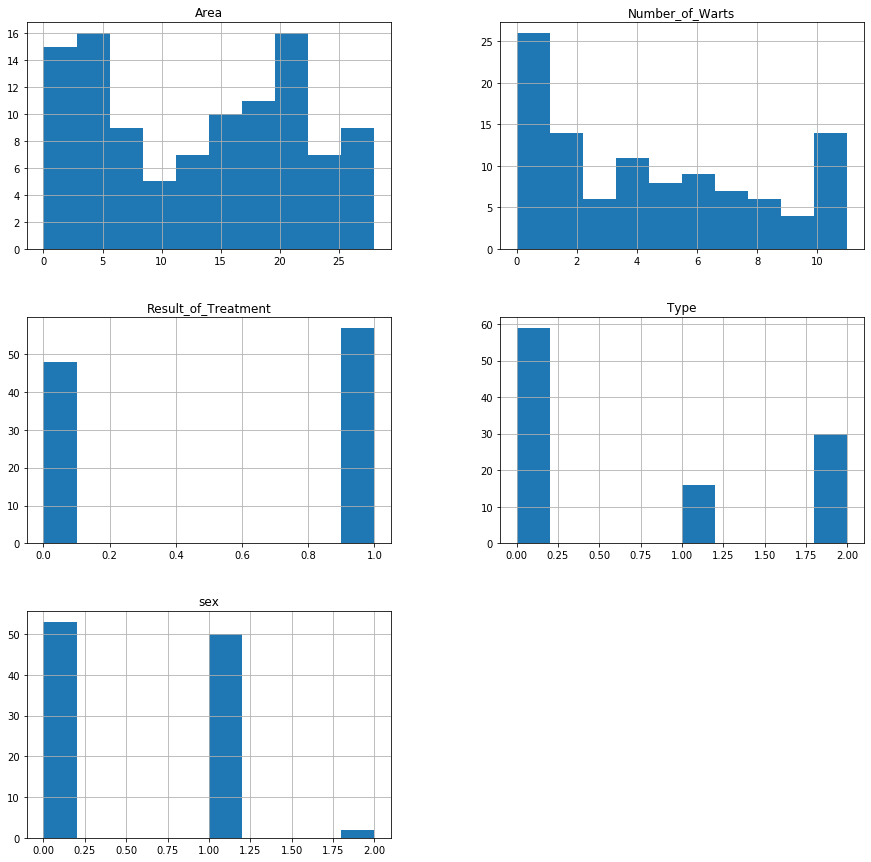

In [14]:
df_2.hist(figsize=(15,15))
plt.show()

### BOXPLOT
Boxplot berfungsi sebagai penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data, ukuran tendensi sentral dan ukuran penyebaran data pengamatan. 

sex                       AxesSubplot(0.125,0.821923;0.168478x0.0580769)
Number_of_Warts        AxesSubplot(0.327174,0.821923;0.168478x0.0580769)
Type                   AxesSubplot(0.529348,0.821923;0.168478x0.0580769)
Area                   AxesSubplot(0.731522,0.821923;0.168478x0.0580769)
Result_of_Treatment       AxesSubplot(0.125,0.752231;0.168478x0.0580769)
dtype: object

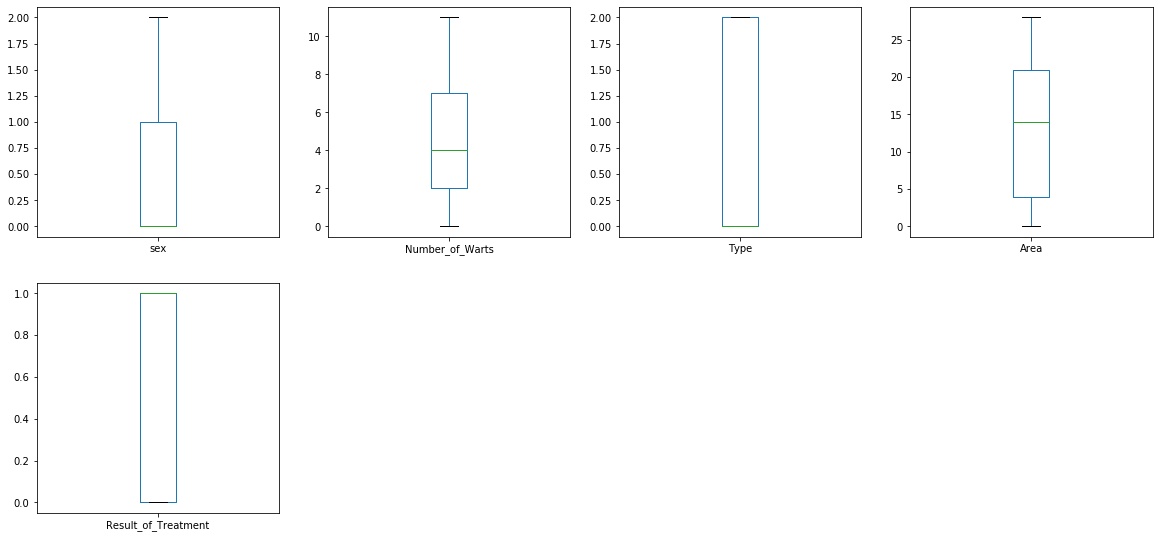

In [15]:
df_2.plot(kind='box', subplots=True, layout=(11,4), sharex=False, sharey=False, figsize=(20,55))

### FEATURE NORMALIZATION
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. 
Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. 
Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).
Melakukan scaling dataset dan Mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.

In [16]:
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(x)
feature_scaled.shape

(105, 4)

In [17]:
print(y)

[0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### SEQUENTIAL MODEL

Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [19]:
model = Sequential()
model.add(Dense(units= 10, input_dim= 4, activation='relu'))
model.add(Dense(units= 7, activation='relu'))
model.add(Dense(units= 3, activation='sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 24        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=Adam(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=30)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 84 samples, validate on 21 samples
Epoch 1/30
84/84 [==============================] - 5s 54ms/step - loss: 1.6636 - acc: 0.3690 - val_loss: 1.4496 - val_acc: 0.4286
Epoch 2/30
84/84 [==============================] - 0s 596us/step - loss: 1.0228 - acc: 0.4762 - val_loss: 0.9629 - val_acc: 0.4762
Epoch 3/30
84/84 [==============================] - 0s 357us/step - loss: 0.8711 - acc: 0.4643 - val_loss: 0.7926 - val_acc: 0.4762
Epoch 4/30
84/84 [==============================] - 0s 357us/step - loss: 0.7670 - acc: 0.4643 - val_loss: 0.7214 - val_acc: 0.4762
Epoch 5/30
84/84 [==============================] - 0s 476us/step - loss: 0.7221 - acc: 0.4643 - val_loss: 0.7026 - val_acc: 0.4762
Epoch 6/30
84/84 [==============================] - 0s 238us/step - loss: 0.7072 - acc: 0.4643 - val_loss: 0.6967 - val_acc: 0.4762
Epoch 7/30
84/84 [==============================] - 0s 357us/step - lo

In [23]:
acc_testing  = model.evaluate(x_test, y_test) 
print('\nAccuracy is', acc_testing[1])

21/21 [==============================] - 0s 11ms/step

Accuracy is 0.523809552192688


### TRAINING AND TESTING ACCURACY

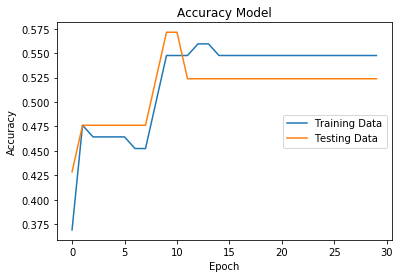

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='center right')
plt.show()
plt.savefig('Cryotherapy akurasi')

### TRAINING AND TESTING LOSS

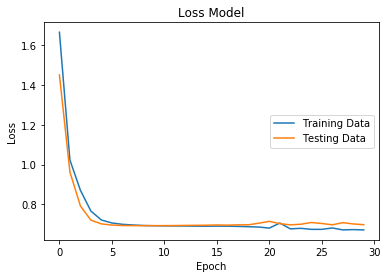

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='center right')
plt.show()
plt.savefig('Cryotherapy loss')

### CONFUSION MATRIX
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [26]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [27]:
print("Confussion matrix:\n",cm)

Confussion matrix:
 [[ 0 10]
 [ 0 11]]


In [28]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = tp/(tp + fn)

C:\Users\NurFaizah\Anaconda3\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\NurFaizah\Anaconda3\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


In [29]:
print("precesion   : ",precision)
print("recall      : ",recall)
print("F1          : ",f1)
print("sensitivity : ",sensitivity)
print("accuracy    : ",accuracy)

precesion   :  0.0
recall      :  nan
F1          :  nan
sensitivity :  nan
accuracy    :  0.5238095238095238
